In [2]:
import h5py
import scipy.io as scio
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from mpl_toolkits.basemap import Basemap as bmp

# mean state compare

In [2]:
data = scio.loadmat('./scatter_model.mat')
stdl_m = data['stdl_m']
stdh_m = data['stdh_m']
stdl = data['stdl']
stdh = data['stdh']
mn = data['mn']
stdr_m = stdl_m/stdh_m

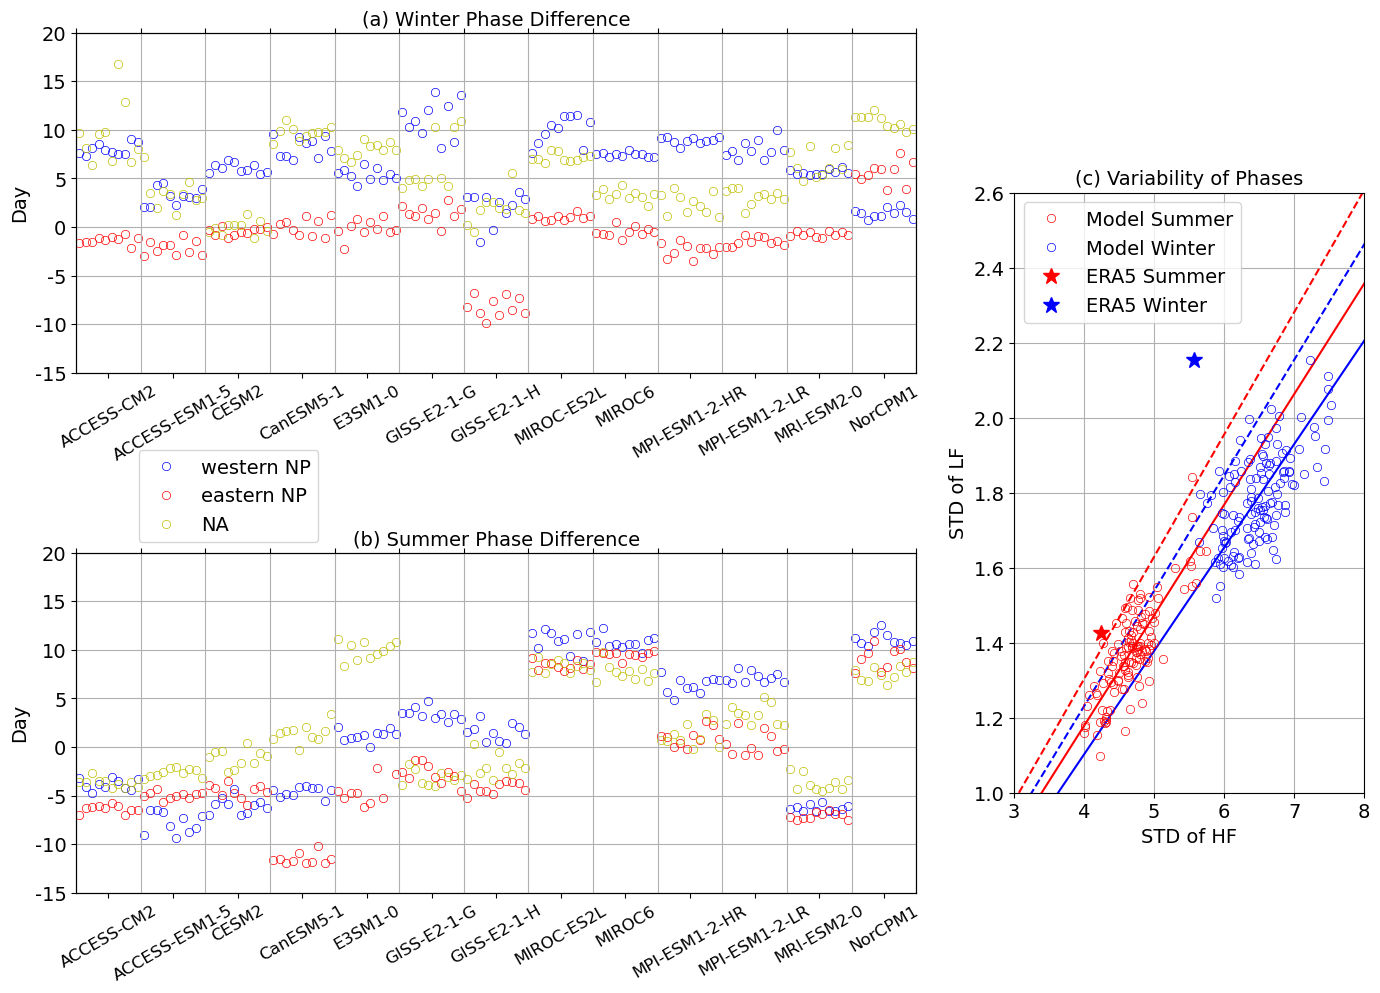

In [3]:
key1=['western NP','eastern NP','NA']
model=['ACCESS-CM2','ACCESS-ESM1-5','CESM2','CanESM5-1','E3SM1-0', \
     'GISS-E2-1-G','GISS-E2-1-H','MIROC-ES2L','MIROC6','MPI-ESM1-2-HR', \
     'MPI-ESM1-2-LR','MRI-ESM2-0','NorCPM1']

plt_pos=np.zeros((3,4))
plt_pos[0,:]=[.05,.62,.6,.34]
plt_pos[1,:]=[.05,.1,.6,.34]
plt_pos[2,:]=[.72,.2,.25,.6]
title_str=['(a) Winter Phase Difference','(b) Summer Phase Difference', \
           '(c) Variability of Phases']

fig2 = plt.figure(figsize=[14,10])

ax1 = plt.axes(plt_pos[0,:])
lns1 = plt.plot(np.arange(0,130,1),mn[1,:,0],'bo',ms=6, \
                   mfc='none',mew=.5,label='western NP')
lns2 = plt.plot(np.arange(0,130,1),mn[1,:,1],'ro',ms=6, \
                   mfc='none',mew=.5,label='eastern NP')
lns3 = plt.plot(np.arange(0,130,1),mn[1,:,2],'yo',ms=6, \
                   mfc='none',mew=.5,label='NA')
ax1.set_xticks(np.arange(4.5,130,10),model,rotation=30,fontsize=12)
ax1.set_yticks(np.arange(-30,30,5),np.arange(-30,30,5),fontsize=14)
ax1.set_xlim(-.5,129.5)
ax1.set_ylim(-15,20)
ax1.grid(axis='y')
ax1.set_ylabel('Day',fontsize=14)
ax2 = ax1.twiny()
ax2.set_xticks(np.arange(-.5,130,10))
ax2.set_xlim(-.5,129.5)
ax2.xaxis.set_ticklabels([])
ax2.grid()
plt.title(title_str[0],fontsize=14)

ax1 = plt.axes(plt_pos[1,:])
lns1 = plt.plot(np.arange(0,130,1),mn[0,:,0],'bo',ms=6, \
                   mfc='none',mew=.5,label='western NP')
lns2 = plt.plot(np.arange(0,130,1),mn[0,:,1],'ro',ms=6, \
                   mfc='none',mew=.5,label='eastern NP')
lns3 = plt.plot(np.arange(0,130,1),mn[0,:,2],'yo',ms=6, \
                   mfc='none',mew=.5,label='NA')
ax1.set_xticks(np.arange(4.5,130,10),model,rotation=30,fontsize=12)
ax1.set_yticks(np.arange(-30,30,5),np.arange(-30,30,5),fontsize=14)
ax1.set_xlim(-.5,129.5)
ax1.set_ylim(-15,20)
ax1.grid(axis='y')
ax1.set_ylabel('Day',fontsize=14)
ax2 = ax1.twiny()
ax2.set_xticks(np.arange(-.5,130,10))
ax2.set_xlim(-.5,129.5)
ax2.xaxis.set_ticklabels([])
ax2.grid()
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns,labs,bbox_to_anchor=(.3,1.33),fontsize=14)
plt.title(title_str[1],fontsize=14)

ax1 = plt.axes(plt_pos[2,:])
plt.plot(np.arange(10.),np.mean(stdr_m[:,0])*np.arange(10.),c='r')
plt.plot(np.arange(10.),(np.mean(stdr_m[:,0])+2*np.std(stdr_m[:,0]))*np.arange(10.), \
         c='r',ls='--')
plt.plot(np.arange(10.),np.mean(stdr_m[:,1])*np.arange(10.),c='b')
plt.plot(np.arange(10.),(np.mean(stdr_m[:,1])+2*np.std(stdr_m[:,1]))*np.arange(10.), \
         c='b',ls='--')
lns1 = plt.plot(stdh_m[:,0],stdl_m[:,0],'ro',ms=6, \
                   mfc='none',mew=.5,label='Model Summer')
lns2 = plt.plot(stdh_m[:,1],stdl_m[:,1],'bo',ms=6, \
                   mfc='none',mew=.5,label='Model Winter')
lns3 = plt.plot(stdh[:,0],stdl[:,0],'r*',ms=12,label='ERA5 Summer')
lns4 = plt.plot(stdh[:,1],stdl[:,1],'b*',ms=12,label='ERA5 Winter')
ax1.set_xticks(np.arange(3,10,1),np.arange(3,10,1),fontsize=14)
ax1.set_yticks(np.arange(5,16,1)/5,np.arange(5,16,1)/5,fontsize=14)
ax1.set_xlim(3,8)
ax1.set_ylim(1,2.6)
ax1.set_xlabel('STD of HF',fontsize=14)
ax1.set_ylabel('STD of LF',fontsize=14)
ax1.grid()
lns = lns1+lns2+lns3+lns4
labs = [l.get_label() for l in lns]
ax1.legend(lns,labs,loc=2,fontsize=14)
plt.title(title_str[2],fontsize=14)

#fig2.suptitle('Trend of SST Phase 1959-2021')

plt.show()
fig2.savefig('scatter_model.pdf',dpi=200)

# low-frequent component compare

## model & observation

In [3]:
data = scio.loadmat('./model_era_corr.mat')
corr = data['corr']

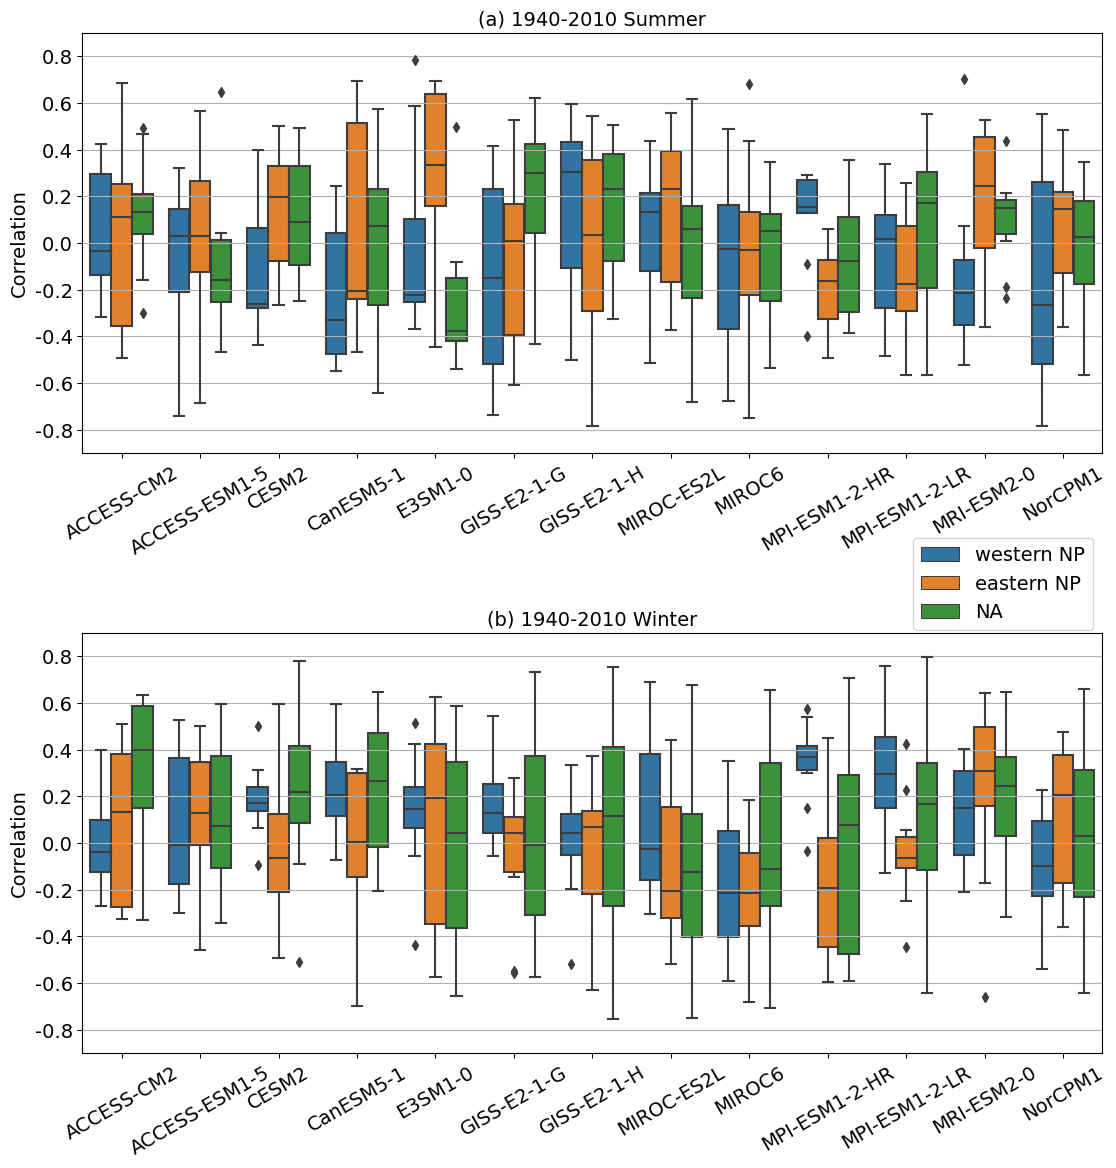

In [4]:
corr1=np.squeeze(np.reshape(corr[0,:,:,:],(1,-1),order='F'))
corr2=np.squeeze(np.reshape(corr[1,:,:,:],(1,-1),order='F'))
region=[]
model=[]
key1=['western NP','eastern NP','NA']
key2=['ACCESS-CM2','ACCESS-ESM1-5','CESM2','CanESM5-1','E3SM1-0', \
     'GISS-E2-1-G','GISS-E2-1-H','MIROC-ES2L','MIROC6','MPI-ESM1-2-HR', \
     'MPI-ESM1-2-LR','MRI-ESM2-0','NorCPM1']
for k in range(3):
    for j in range(13):
        for i in range(10):
            region.append(key1[k])
            model.append(key2[j])
            
df1 = pd.DataFrame({'correlation': corr1,
                   'region': region,
                   'model': model})
df2 = pd.DataFrame({'correlation': corr2,
                   'region': region,
                   'model': model})

plt_pos=np.zeros((2,4))
plt_pos[0:2,0]=.1
plt_pos[0,1]=.6
plt_pos[1,1]=.1
plt_pos[:,2]=.85
plt_pos[:,3]=.35

fig2 = plt.figure(figsize=[12,12])

ax1 = plt.axes(plt_pos[0,:])
ax1.grid()
sns.boxplot(x = df1['model'],
            y = df1['correlation'],
            hue = df1['region'])
plt.xticks(rotation = 30,fontsize=14)
plt.xlabel('')
plt.yticks(np.arange(-8,10,2)/10,np.arange(-8,10,2)/10,fontsize=14)
plt.ylabel('Correlation',fontsize=14)
plt.ylim(-.9,.9)
plt.title('(a) 1940-2010 Summer',fontsize=14)
ax1.get_legend().remove()

ax2 = plt.axes(plt_pos[1,:])
ax2.grid()
sns.boxplot(x = df2['model'],
            y = df2['correlation'],
            hue = df2['region'])
plt.xticks(rotation = 30,fontsize=14)
plt.xlabel('')
plt.yticks(np.arange(-8,10,2)/10,np.arange(-8,10,2)/10,fontsize=14)
plt.ylabel('Correlation',fontsize=14)
plt.ylim(-.9,.9)
ax2.legend(bbox_to_anchor=(1.,1.25),fontsize=14)
plt.title('(b) 1940-2010 Winter',fontsize=14)
plt.show()

#fig2.suptitle('Trend of SST Phase 1959-2021')

plt.show()
fig2.savefig('model_era_corr.pdf',dpi=200)

## inter-model compare

In [7]:
data = scio.loadmat('./model_self_corr.mat')
self_rr = data['self_rr']

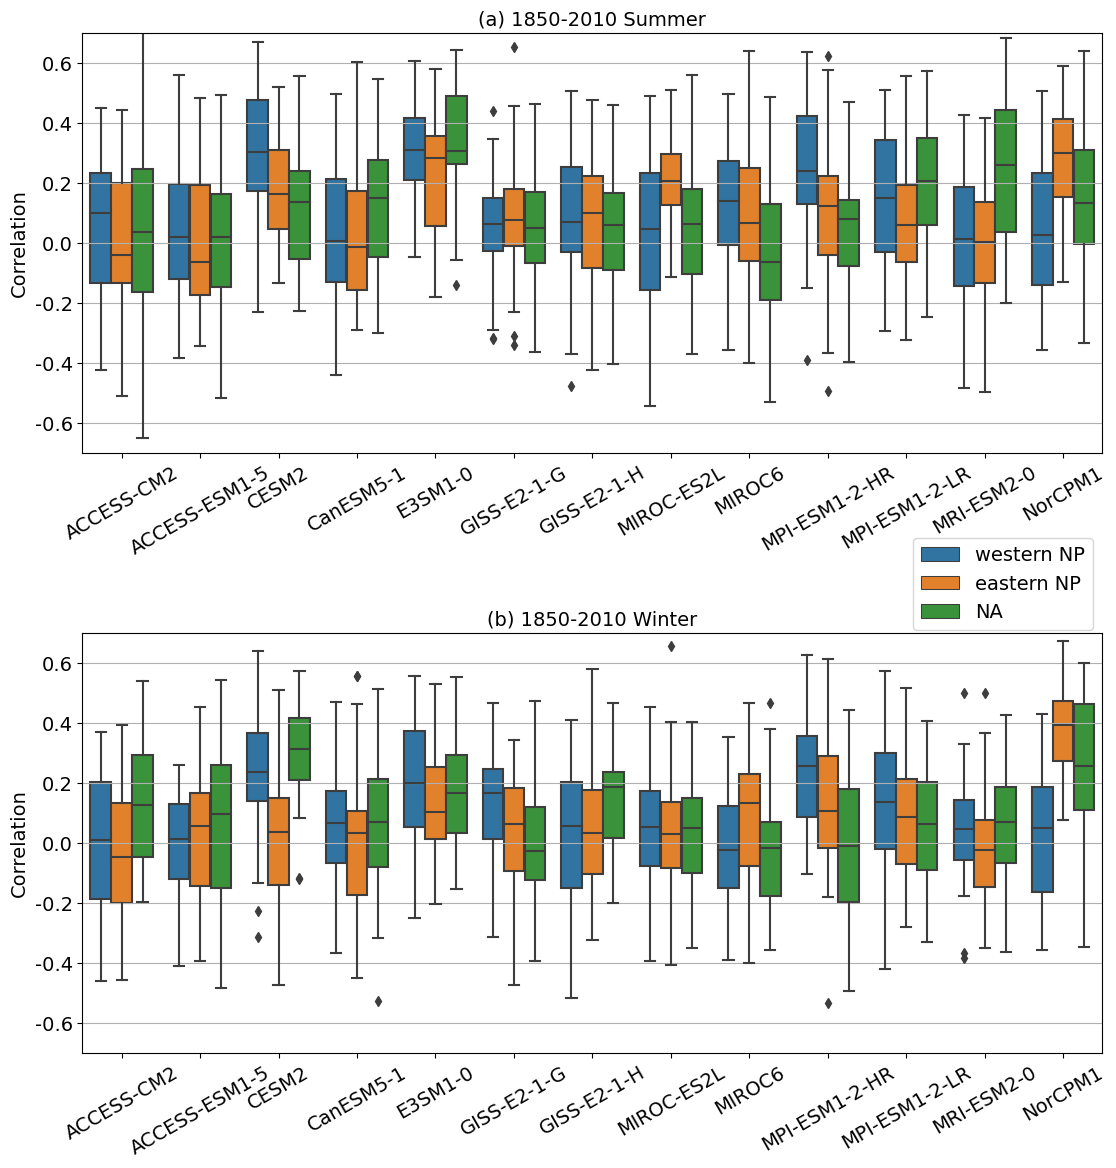

In [8]:
corr1=np.squeeze(np.reshape(self_rr[:,0,:,:],(1,-1),order='F'))
corr2=np.squeeze(np.reshape(self_rr[:,1,:,:],(1,-1),order='F'))
region=[]
model=[]
key1=['western NP','eastern NP','NA']
key2=['ACCESS-CM2','ACCESS-ESM1-5','CESM2','CanESM5-1','E3SM1-0', \
     'GISS-E2-1-G','GISS-E2-1-H','MIROC-ES2L','MIROC6','MPI-ESM1-2-HR', \
     'MPI-ESM1-2-LR','MRI-ESM2-0','NorCPM1']
for k in range(13):
    for j in range(3):
        for i in range(45):
            region.append(key1[j])
            model.append(key2[k])
            
df1 = pd.DataFrame({'correlation': corr1,
                   'region': region,
                   'model': model})
df2 = pd.DataFrame({'correlation': corr2,
                   'region': region,
                   'model': model})

plt_pos=np.zeros((2,4))
plt_pos[0:2,0]=.1
plt_pos[0,1]=.6
plt_pos[1,1]=.1
plt_pos[:,2]=.85
plt_pos[:,3]=.35

fig2 = plt.figure(figsize=[12,12])
ax1 = plt.axes(plt_pos[0,:])
ax1.grid()
sns.boxplot(x = df1['model'],
            y = df1['correlation'],
            hue = df1['region'])
plt.xticks(rotation = 30,fontsize=14)
plt.xlabel('')
plt.yticks(np.arange(-8,10,2)/10,np.arange(-8,10,2)/10,fontsize=14)
plt.ylabel('Correlation',fontsize=14)
plt.ylim(-.7,.7)
plt.title('(a) 1850-2010 Summer',fontsize=14)
ax1.get_legend().remove()

ax2 = plt.axes(plt_pos[1,:])
ax2.grid()
sns.boxplot(x = df2['model'],
            y = df2['correlation'],
            hue = df2['region'])
plt.xticks(rotation = 30,fontsize=14)
plt.xlabel('')
plt.yticks(np.arange(-8,10,2)/10,np.arange(-8,10,2)/10,fontsize=14)
plt.ylabel('Correlation',fontsize=14)
plt.ylim(-.7,.7)
ax2.legend(bbox_to_anchor=(1.,1.25),fontsize=14)
plt.title('(b) 1850-2010 Winter',fontsize=14)

plt.show()
fig2.savefig('model_self_corr.pdf',dpi=200)